% Introduction


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%precision 2
%matplotlib inline

# Explore the Data

In [161]:
# Add headers to the data and load text as a dataframe
headers = ['customer_id', 'purchase_amount', 'date_of_purchase']
df = pd.read_csv('purchases.txt', header=None, 
                 names=headers, sep='\t')
df.head()

,customer_id,purchase_amount,date_of_purchase
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [162]:
# Interpret the last column as a date
df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'], 
                                        format='%Y-%m-%d')

In [163]:
# Extract year of purchase and save it as a column
df['year_of_purchase'] = df['date_of_purchase'].dt.year

In [164]:
# Display 5 randomly selected rows
df.sample(n=5, random_state=26)

,customer_id,purchase_amount,date_of_purchase,year_of_purchase
1597,16730,40.0,2006-11-08,2006
501,99890,20.0,2008-06-18,2008
38205,165760,60.0,2011-11-25,2011
6400,47500,15.0,2005-12-28,2005
18334,9790,30.0,2012-03-03,2012


In [165]:
# Show data information after data transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       51243 non-null  int64         
 1   purchase_amount   51243 non-null  float64       
 2   date_of_purchase  51243 non-null  datetime64[ns]
 3   year_of_purchase  51243 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 MB


In [166]:
df['purchase_amount'].describe()

count    51243.000000
mean        62.337195
std        156.606801
min          5.000000
25%         25.000000
50%         30.000000
75%         60.000000
max       4500.000000
Name: purchase_amount, dtype: float64

In [167]:
df['year_of_purchase'].describe()

count    51243.000000
mean      2010.869699
std          2.883072
min       2005.000000
25%       2009.000000
50%       2011.000000
75%       2013.000000
max       2015.000000
Name: year_of_purchase, dtype: float64

In [168]:
x = df[['year_of_purchase', 'purchase_amount']].groupby('year_of_purchase').count()
x

,purchase_amount
year_of_purchase,
2005,1470
2006,2182
2007,4674
2008,4331
2009,5054
2010,4939
2011,4785
2012,5960
2013,5912


In [169]:
x.rename(columns={'purchase_amount': 'Number of Purchases'})

,Number of Purchases
year_of_purchase,
2005,1470
2006,2182
2007,4674
2008,4331
2009,5054
2010,4939
2011,4785
2012,5960
2013,5912


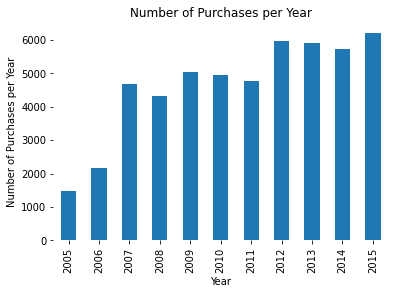

In [170]:
# Number of Purchases per year

ax = x.plot.bar(ylabel='Number of Purchases per Year', xlabel='Year')
plt.gca().get_legend().remove()
#plt.legend(['Number of Purchases per Year'])
plt.title('Number of Purchases per Year')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

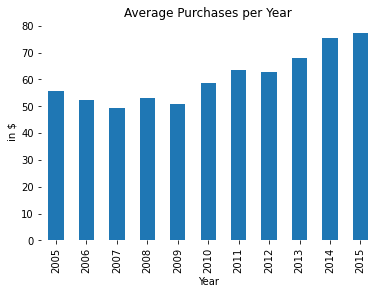

In [171]:
# Average Purchases per Year

x = df[['year_of_purchase', 'purchase_amount']].groupby('year_of_purchase').mean()
ax = x.plot.bar(xlabel='Year', ylabel='in \$')
plt.gca().get_legend().remove()
#plt.legend(['Number of Purchases per Year'])
plt.title('Average Purchases per Year')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

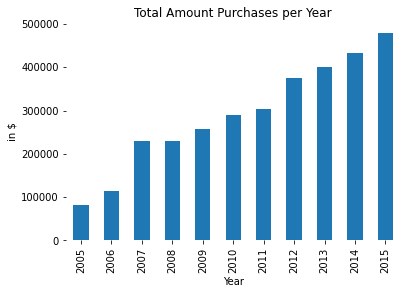

In [172]:
# Total purchase amounts per year

x = df[['year_of_purchase', 'purchase_amount']].groupby('year_of_purchase').sum()
ax = x.plot.bar(xlabel='Year', ylabel='in \$')
plt.gca().get_legend().remove()
#plt.legend(['Number of Purchases per Year'])
plt.title('Total Amount Purchases per Year')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
